<a href="https://colab.research.google.com/github/sara-paracha/Extracting-data-using-regular-expression-creating-recommendation-Engine/blob/main/AirBnb_website_Recommendation_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#  ***Project: Extracting data from AirBnb website using regular expressions & creating a recommendation Engine***

Main aim of this project is to parse a list of rentals in order to extract the different features each listing. Data has been collected in the form of pdf files from AirBnB website.

After extracting features from pdf files, a dataframe has been created and transferred to a csv file. Then data is cleaned like removing null values, converting string to integers , removing string from columns.

For further analysis few graphs have been plotted and a recommendation engine has been created which would take input from user and filter listings as per their request. 

importing libraries required for analysis.

In [ ]:
import pandas as pd
import numpy as np
import re
import glob
!pip install pdfminer.six
import pdfminer
from pdfminer.high_level import extract_text
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 5.6 MB 12.4 MB/s 
     |████████████████████████████████| 3.6 MB 45.4 MB/s 


Here file contains all pdf files that are stored in the folder homes.Then using 'extract_text' each file is passed in order to extract text from the PDF document. Then regular expressions are used to extract various features.

In [ ]:
host_name_list = []
review_list = []
bedroom_list = []
wifi_list = []
price_list = []
smoking_list = []
pets_list = []
superhost_list = []
bathroom_list = []
guest_list = []
rating_list = []
response_rate_list = []
cancellation_list = []
amenities_list = []
Type_list = []
# file_no = 1


for file in glob.glob("/content/drive/MyDrive/homes/*.pdf"):
    # print(file)
    text = extract_text(file).lower()
    # print("#####",file_no , file,"#####\n")
    # file_no = file_no + 1
    
## regular expressions are used to extract various features

    host_name = re.findall('hosted by\W+\w+|managed by\W+\w+|verified by\W+\w+', text)[:1]
    host_name_list.append(host_name)

   
    rating = re.findall('\d\.\d\n',text)[:1]
    if len(rating) == 0:
      rating = 0
    elif'\n' in rating[0]:
      rating = rating[0].strip('\n')
    # rating = re.findall('\d+\.\d+' , text)[:1]
    rating_list.append(rating)

    review = re.findall('\d+ reviews' , text)[:1]
    if rating == 0:
      review = 0
    elif len(review) == 0:
      review = 0
    review_list.append(review)

    bedroom = re.findall('\d+ bedrooms?|\d+ beds?' , text)[:1]
    if len(bedroom) == 0:
      bedroom = 0
    bedroom_list.append(bedroom)

    wifi = re.findall('internet|wifi' ,text)[:1]
    if len(wifi) == 0:
      wifi = ['not provided']
    wifi_list.append(wifi)

    price = re.findall('\$\d+\W+\w+' ,text)[:1]
    if len(price) == 0:
      price = 0
    price_list.append(price)

    smoking = re.findall('\w+ smoking|\w+ smoking \w+|smoking is allowed|smoking is not allowed' ,text)[:1]
    if len(smoking) == 0:
      smoking = ['not provided']
    smoking_list.append(smoking)

    pets = re.findall('pets allowed|no pets|pets not allowed',text)
    if len(pets) == 0:
      pets = ['not provided']
    pets_list.append(pets)

    superhost = re.findall('superhost|premier host',text)[:1]
    if len(superhost) == 0:
      superhost = ['not a superhost']
    superhost_list.append(superhost)

    bathroom = re.findall("\d+ baths?|\d+ bathrooms?",text)[:1]
    if len(bathroom) == 0:
      bathroom = 0
    bathroom_list.append(bathroom)

    guest = re.findall(' \d+ guests|maximum guests\W+\d+|maximum \w+? guests\W+\d+|sleeps \d+.?|max guests\W+\d+', text)[:1]
    if len(guest) == 0:
      guest = 0
    guest_list.append(guest)  

    response_rate = re.findall('response rate\W+\d+\%|response time\W+\d+\%' , text)
    if len(response_rate) == 0:
      response_rate = 0
    response_rate_list.append(response_rate)

    cancellation = re.findall('free cancellation', text)[:1]
    if len(cancellation) == 0:
      cancellation = ['not provided']
    cancellation_list.append(cancellation)

    amenities = re.findall('kitchen|washer|dryer|patio|balcony|parking|tv|television|air conditioning|ac|garden',text)
    amenities_list.append(list(set(amenities)))

    Type = re.findall('.*?entire(?:(?!hosted).)*', text)[:1]
    Type_list.append(Type)


##### **Creating a Dataframe**

In [ ]:
##adding retrieved data to the dataframe.

df = (pd.DataFrame([host_name_list,rating_list,price_list, Type_list,bedroom_list,bathroom_list, wifi_list,amenities_list, smoking_list, pets_list, superhost_list,guest_list, response_rate_list,review_list, cancellation_list])).T
# df = df.T
df.columns= ['Host', 'Ratings', 'Price','Type','Bedrooms', 'Baths','Wifi Available','Amenities', 'Smoking', 'Pets', 'Superhost', 'Guest', 'Response Rate','Reviews' ,'Cancellation Policy']
df = df.applymap(lambda x: ",".join(x) if isinstance(x, list) else x)
df.head(3)  

,Host,Ratings,Price,Type,Bedrooms,Baths,Wifi Available,Amenities,Smoking,Pets,Superhost,Guest,Response Rate,Reviews,Cancellation Policy
0,hosted by nicole,0,$215 / night,entire residential home,2 bedrooms,3 baths,wifi,"patio,ac,air conditioning,parking,washer,tv,ki...",no smoking,no pets,not a superhost,4 guests,response rate: 80%,0,not provided
1,hosted by christie,5.0,$384 / night,entire residential home,3 bedrooms,2 baths,wifi,"patio,dryer,ac,air conditioning,parking,washer...",not provided,pets allowed,superhost,6 guests,response rate: 100%,3 reviews,not provided
2,hosted by christie,5.0,$356 / night,entire residential home,2 bedrooms,2 baths,wifi,"dryer,ac,air conditioning,parking,washer,tv,ki...",no smoking,no pets,superhost,6 guests,response rate: 100%,5 reviews,not provided


##### **Transferring extracted fearures to a csv file 'features-retrieved-by-SaraParacha'**

In [ ]:
csv1=df.to_csv(r'features-retrieved-by-SaraParacha.csv',index=None,header=True)

### **Further Analysis for Recommending Listings**

### **Data Preprocessing**

<function matplotlib.pyplot.show>

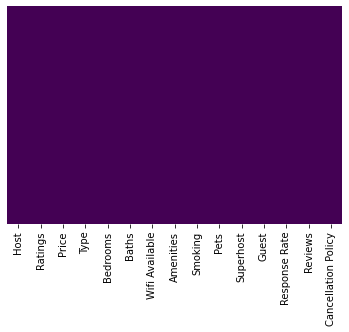

In [ ]:
## checking for missing values in dataset

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show

Missing values are represented by a yellow dash., hence it can be observed there are no missing values in data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Host                 101 non-null    object
 1   Ratings              101 non-null    object
 2   Price                101 non-null    object
 3   Type                 101 non-null    object
 4   Bedrooms             101 non-null    object
 5   Baths                101 non-null    object
 6   Wifi Available       101 non-null    object
 7   Amenities            101 non-null    object
 8   Smoking              101 non-null    object
 9   Pets                 101 non-null    object
 10  Superhost            101 non-null    object
 11  Guest                101 non-null    object
 12  Response Rate        101 non-null    object
 13  Reviews              101 non-null    object
 14  Cancellation Policy  101 non-null    object
dtypes: object(15)
memory usage: 12.0+ KB


In [ ]:
### removing extra words each column 

df['Bedrooms'] = df['Bedrooms'].str.strip('bedrooms')
df['Baths'] = df['Baths'].str.strip('baths')
df['Price'] = df['Price'].str.strip('$/ night')
df['Guest'] = df['Guest'].str.strip('max guest:')
df['Reviews'] = df['Reviews'].str.strip('reviews')

### replacing some characters/words 

df['Price'] = df['Price'].map(lambda x : x.replace(',' , ""))
df['Host'] = df['Host'].map(lambda x: x.replace("hosted by ",""))
df['Wifi Available'] = df['Wifi Available'].str.replace('internet','wifi')
df['Superhost'] = df['Superhost'].str.replace('premier host','superhost')
df['Pets'] = df['Pets'].str.replace('no pets,pets allowed','no pets')
df['Amenities'] =df['Amenities'].apply(lambda x : x.split(','))

### removing extra sentences and null values from type column to get specfic house type

df.drop(df[df['Type'].str.len()>28].index, inplace = True)
df[df['Type']==""] = np.NaN

### converting columns from string to int/float as required

cols = ['Baths','Bedrooms','Guest','Price']
df[cols] = df[cols].astype('int64')
df['Ratings'] = df['Ratings'].astype('float')
df.fillna('not provided', inplace = True)

df.head(3)

,Host,Ratings,Price,Type,Bedrooms,Baths,Wifi Available,Amenities,Smoking,Pets,Superhost,Guest,Response Rate,Reviews,Cancellation Policy
0,nicole,0.0,215,entire residential home,2,3,wifi,"[patio, ac, air conditioning, parking, washer,...",no smoking,no pets,not a superhost,4,response rate: 80%,not provided,not provided
1,christie,5.0,384,entire residential home,3,2,wifi,"[patio, dryer, ac, air conditioning, parking, ...",not provided,pets allowed,superhost,6,response rate: 100%,3,not provided
2,christie,5.0,356,entire residential home,2,2,wifi,"[dryer, ac, air conditioning, parking, washer,...",no smoking,no pets,superhost,6,response rate: 100%,5,not provided


In [ ]:
df.Price.unique()
df.Guest.unique()
df.Bedrooms.unique()
df.Baths.unique()
df.Reviews.unique()

array(['not provided', '3 ', '5 ', '31 ', '85 ', '4 ', '48 ', '68 ',
       '140 ', '7 ', '492 ', '8 ', '75 ', '18 ', '472 ', '136 ', '47 ',
       '49 ', '14 ', '13 ', '108 ', '11 ', '15 ', '34 ', '20 ', '16 ',
       '65 ', '72 ', '9 ', '118 ', '79 ', '30 ', '56 ', '188 ', '316 ',
       '40 ', '83 ', '71 ', '32 ', '182 ', '22 ', '26 ', '43 ', '25 ',
       '36 ', '150 ', '64 ', '24 '], dtype=object)

#### **Heatmap**

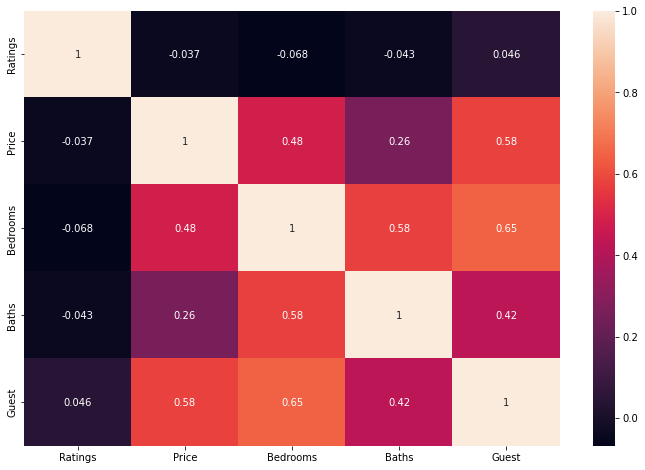

In [ ]:
###Correlation between different variables

corr = df.corr(method='kendall')
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)
plt.show()

It shows number of bedrooms in a house are higly correlated with the rent of the house. However, prices of the house and ratings have a weak correlation.

#### **Bar Plot**

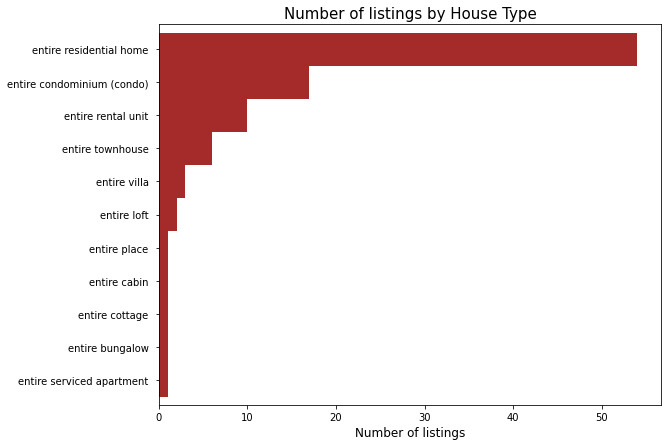

In [ ]:
feq=df['Type'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(9,7 ), color = 'brown', width = 1)
plt.title("Number of listings by House Type", fontsize=15)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

Mostly houses in our data are resendtial homes. We can say many people buy houses and rent them on airbnb.

#### **Scatter Plot**

<Figure size 1440x720 with 0 Axes>

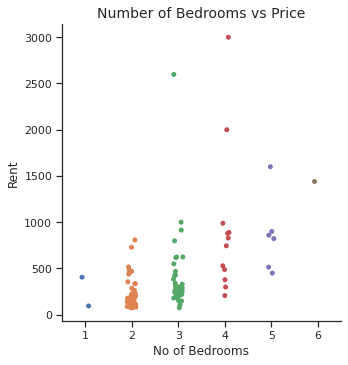

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.set_theme(style="ticks")
sns.catplot(x="Bedrooms", y="Price", data=df)
plt.title("Number of Bedrooms vs Price", fontsize=14)
plt.xlabel('No of Bedrooms')
plt.ylabel('Rent')
plt.show()

As we saw earlier, price and number of bedrooms were higly correlated. Here as the number of bedrooms increases rent of the place also rises. But one factor which is missing in our data location as it is also key factor which can increase or decrese rent .

In [ ]:
## Using label Encoder for converting categorical data to numerical data(0,1,2...)

label = LabelEncoder()
df['Pets'] = label.fit_transform(df['Pets'])
df['Smoking'] = label.fit_transform(df['Smoking'])
df['Wifi Available'] = label.fit_transform(df['Wifi Available'])
df['Superhost'] = label.fit_transform(df['Superhost'])
df['Cancellation Policy'] = label.fit_transform(df['Cancellation Policy'])
df['Type'] = label.fit_transform(df['Type'])

df.head(5)

,Host,Ratings,Price,Type,Bedrooms,Baths,Wifi Available,Amenities,Smoking,Pets,Superhost,Guest,Response Rate,Reviews,Cancellation Policy
0,nicole,0.0,215,7,2,3,1,"[patio, ac, air conditioning, parking, washer,...",0,0,0,4,response rate: 80%,not provided,1
1,christie,5.0,384,7,3,2,1,"[patio, dryer, ac, air conditioning, parking, ...",1,2,1,6,response rate: 100%,3,1
2,christie,5.0,356,7,2,2,1,"[dryer, ac, air conditioning, parking, washer,...",0,0,1,6,response rate: 100%,5,1
3,ryan,5.0,112,6,2,2,1,"[patio, dryer, ac, air conditioning, parking, ...",2,0,1,4,response rate: 100%,31,1
4,josie,0.0,240,10,3,2,1,"[dryer, ac, parking, washer, tv, kitchen]",0,2,0,6,response rate: 100%,not provided,1


### **Recommendation Engine**

In [ ]:
my_dict = {}

def recommendation_engine(req):

  #### Input data to filter listings as per your requirement
    my_dict = {}

    no_of_beds= int(input('Number of Bedrooms required: '))
    ratings = float(input("Least ratings required: "))
    price = int(input("Your Budget:"))
    # type = input("Type of the residence required: ")
    baths = int(input('Number of bathrooms required: '))
    wifi_req = int(input("wifi preferences (yes:0 /not required :1) : "))
    # amenities = input("Required amenities (with commas): ")
    smoking = int(input("Smoking preferences (no smoking:0 /not provided:1 /smoking allowed:2) : "))
    pets = int(input("Do u have pets (no pets:0/not provided:1/pets allowed: 2) : "))

    my_dict['ratings'] = ratings
    my_dict['price'] = price
    my_dict['no_of_beds'] = no_of_beds
    my_dict['baths'] = baths
    # my_dict['amenities'] = amenities
    # my_dict['amenities'] = my_dict['amenities'].split(",")
    my_dict['wifi_req'] = wifi_req
    my_dict['smoking'] = smoking
    my_dict['pets'] = pets

    print('\n\n','My Requirements','\n',my_dict)

    filtered = df[df['Ratings'] >= my_dict['ratings']]
    if len(filtered) == 0:
        print("No home available as per your ratings")
    filtered  = filtered[filtered['Price'] <= my_dict['price']]
    if len(filtered) == 0:
        print("No home available as per your budget")
    filtered  = filtered[filtered['Bedrooms'] >= my_dict['no_of_beds']]
    if len(filtered) == 0:
        print("No home available as per your bedroom requirements")
    filtered  = filtered[filtered['Baths'] >= my_dict['baths']]
    if len(filtered) == 0:
        print("No home available as per your bathroom requirements")
    filtered  = filtered[(filtered['Wifi Available'] == my_dict['wifi_req'])|(filtered['Wifi Available'] != my_dict['wifi_req'])]
    filtered  = filtered[filtered['Smoking'] == my_dict['smoking']]
    if len(filtered) == 0:
        print("No home available due to smoking preferences")
    filtered  = filtered[filtered['Pets'] == my_dict['pets']]
    if len(filtered) == 0:
        print("No home available due to pets preference")
    
    return filtered

In [ ]:
recommendation_engine(my_dict)

Number of Bedrooms required: 3
Least ratings required: 4
Your Budget:400
Number of bathrooms required: 2
wifi preferences (yes:0 /not required :1) : 0
Smoking preferences (no smoking:0 /not provided:1 /smoking allowed:2) : 0
Do u have pets (no pets:0/not provided:1/pets allowed: 2) : 0


 My Requirements 
 {'ratings': 4.0, 'price': 400, 'no_of_beds': 3, 'baths': 2, 'wifi_req': 0, 'smoking': 0, 'pets': 0}


,Host,Ratings,Price,Type,Bedrooms,Baths,Wifi Available,Amenities,Smoking,Pets,Superhost,Guest,Response Rate,Reviews,Cancellation Policy
10,mike,4.9,244,7,3,2,1,"[patio, dryer, ac, air conditioning, parking, ...",0,0,1,6,response rate: 100%,140,1
19,shannon,5.0,180,2,3,2,0,"[dryer, ac, air conditioning, parking, washer,...",0,0,1,8,response rate: 100%,4,1
25,anthony,4.9,285,7,3,2,1,"[garden, ac, dryer, air conditioning, parking,...",0,0,0,6,response rate: 100%,136,1
34,russell,4.9,302,7,3,2,1,"[dryer, ac, air conditioning, parking, washer,...",0,0,1,6,response rate: 100%,108,1
35,ryson,5.0,309,7,3,3,1,"[dryer, ac, air conditioning, parking, washer,...",0,0,1,6,response rate: 98%,11,1
39,ryson,5.0,340,7,3,2,1,"[dryer, ac, air conditioning, parking, washer,...",0,0,1,6,response rate: 98%,15,1
45,evolve,4.2,148,7,3,4,1,"[dryer, ac, garden, air conditioning, parking,...",0,0,1,7,response rate: 100%,472,1
47,ryson,4.9,181,7,3,2,1,"[patio, dryer, ac, garden, air conditioning, p...",0,0,1,6,response rate: 98%,9,1
58,vivian,4.8,196,7,3,5,1,"[patio, dryer, ac, air conditioning, balcony, ...",0,0,1,4,response rate: 100%,56,0
85,tee,4.6,378,7,4,3,1,"[patio, garden, ac, dryer, air conditioning, b...",0,0,0,8,response rate: 98%,25,0


Above dataframe is retrieved as per customer's requirement.

### **Conclusion**

Various features are extracted from website such as amenities ,number of bedrooms , number of bathrooms, ratings, number of reviews and response time of the host which could assist in deciding for which listing to go for. Happy Holidays!!! 